# Name : Aditya Nitin Pise.

# Organization : The Sparks Foundation

# Task 2 : Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

## Step 1 : Importing The Libraries and Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [6]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_df.shape

(150, 4)

In [9]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

From above we can see that iris dataset contains 150 examples and 4 attributes with no null values.

## Step 2 : Using The Elbow Method 

**The Elbow Method is one of the most popular methods to determine this optimal value of k (optimum number of clusters).** 

In [11]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

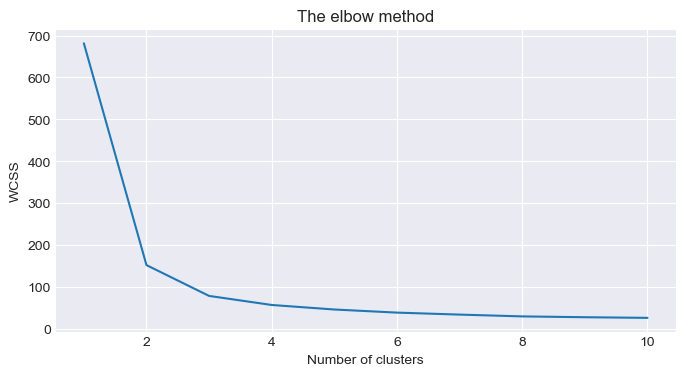

In [21]:
plt.figure(figsize = (8,4), dpi = 100)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

**From this we choose the number of clusters as 3**.

## Step 3 : Training the model(K-Means Clustering)

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

We can use above result to visualize the clusters.

## Step 4 : Visualizing the result

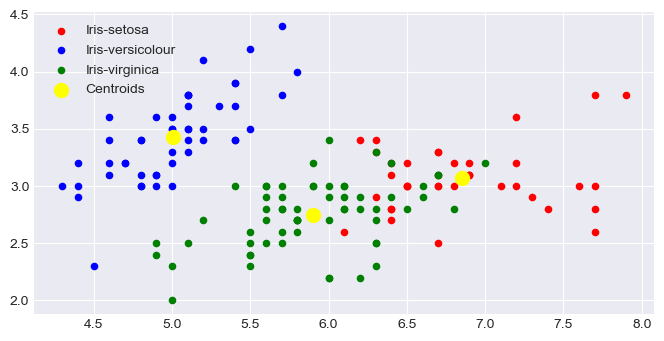

In [29]:
plt.figure(figsize = (8,4), dpi = 100)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In above graph we can 3 different clusters for 3 different flower types. The big Yellow points are the centroids of the clusters.